In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import re
%matplotlib inline
def MSD(path,expt_start,expt_end,moltype=''):
    #df_outputs = pd.read_csv(path+"outputMolPosList.txt",sep=" ",header=None) #Add batch processing here potentially
    df_outputs = pd.read_csv(path+"outputMSDList.txt",sep=" ",header=None) #Add batch processing here potentially

    if moltype=="ribosome":
         df_outputs = df_outputs.iloc[:,0].str.replace('Molpos-tRNA' , 'Molpos-ribosome')
    if moltype=="tRNA":
        df_outputs = df_outputs.iloc[:,0].str.replace('Molpos-tRNA' , 'Molpos-tRNA')
    if moltype=="crowder":
        df_outputs = df_outputs.iloc[:,0].str.replace('Molpos-tRNA' , 'Molpos-crowder')
    r2_lists=list()
    for expt_num, row in enumerate(df_outputs):
        if(expt_num>=expt_start and expt_num<expt_end):
            try:
                df = pd.read_csv(path+row,delimiter=" ",header=None)
                params = pd.read_csv(path+"expt_"+str(expt_num)+'.txt',delim_whitespace=True,names=['var','param','val'])
                #molposTS = float(params.loc[params['param']=='_molPosTS_']['val'].values[0])
                molposTS = float(params.loc[params['param']=='_MSDTS_']['val'].values[0])

                df.columns=["time","r2","r4"]
                r2_lists.append(np.array(df['r2'].tolist()))

            except:
                print("Error (e.g., Missing expt or incorrect input)")
    return r2_lists,np.add.reduce(r2_lists)/(len(r2_lists)),np.arange(0,len(np.add.reduce(r2_lists)/(len(r2_lists))))*molposTS

from analysis_parameters import *
%load_ext autoreload
%autoreload

#First calculate how, on average, volume fraction of ribosomes, crowders, ternary complexes changes w/ growth rate
dbl_rate=np.arange(0,5,0.1)
vox_len = list()
rib_volfrac=list()
tern_volfrac = list()
crowder_volfrac = list()
total_volfrac =list()
rib_num=list()
tern_num=list()
crowder_num=list()
#print(f_vol(dbl_rate[-1]))
#print(f_tern(dbl_rate[99]))

for i in range(len(dbl_rate)):
    cell_volfrac_tot = list()
    cellParams, voxelParams = calcParams(f_rib(dbl_rate[i]),
                                               f_tern(dbl_rate[i]),
                                               f_mass(dbl_rate[i]),
                                               f_vol(dbl_rate[i]),
                                               f_nuc(dbl_rate[i]))
    #print(rib_volfrac)

    if(voxelParams[1][3]<0.8): ###A hard cap on max total volume fraction; set because Qi & Tanner 2011 show that ~0.8 is max for bidisperse system with lambda~5. Thus other parameter combinations must be invalid
        vox_len.append(voxelParams[0])
        rib_volfrac.append(voxelParams[1][0])
        tern_volfrac.append(voxelParams[1][1])
        crowder_volfrac.append(voxelParams[1][2])
        total_volfrac.append(voxelParams[1][3])
        rib_num.append(voxelParams[2][0])
        tern_num.append(voxelParams[2][1])
        crowder_num.append(voxelParams[2][2])
        cell_volfrac_tot.append(cellParams[1][3])
    print(voxelParams[2][0])

#print(np.average(total_volfrac),np.std(total_volfrac), "   ", np.average(cell_volfrac_tot),np.std(cell_volfrac_tot))
print(cellParams)


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
-21.92821444871448
-15.837967398850656
-10.259017394610458
-5.362965982132004
-1.2124230425595681
2.2096303140417315
4.968008074173073
7.149513151919034
8.845539675099523
10.142077044090186
11.115002884466719
11.828658657692069
12.336220114604219
12.680902980953078
12.89744618257596
13.013579874802375
13.051344429833975
13.028214597520593
12.958027883327839
12.85173634125209
12.718007904476963
12.563703718301392
12.394255366679543
12.213962317107741
12.02622628854291
11.833735983877625
11.638612859734662
11.442526337821423
11.2467850429598
11.052409213798365
10.860188303400458
10.670726906049854
10.484481461221646
10.301789653015254
10.12289400942345
9.947960883896
9.777095750942701
9.61035555189477
9.447758673966016
9.289293025837306
9.134922578741778
8.984592667758033
8.8382342893294
8.695767584520507
8.557104660567436
8.422151873830279
8.29081167372908
8.162984088394161
8.038567917621204
7.917461

FileNotFoundError: [Errno 2] File b'/Users/Akshay/Dropbox/Life/EndyLab/Research/TranslationDynamics/data/190319_1948/outputMSDList.txt' does not exist: b'/Users/Akshay/Dropbox/Life/EndyLab/Research/TranslationDynamics/data/190319_1948/outputMSDList.txt'

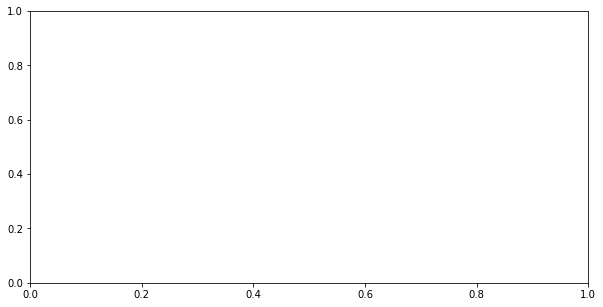

In [8]:
#crowder,ribosome,tRNA
path='/Users/Akshay/Dropbox/Life/EndyLab/Research/TranslationDynamics/data/'
data = "190319_1948/"
fig,ax = plt.subplots(figsize=(10,5))
labels = ['dilute','0.6 dbl/hr','1.0 dbl/hr','1.5 dbl/hr','2.0 dbl/hr','2.5 dbl/hr','3.0 dbl/hr']
D = list()
gr = [0.6,1.0,1.5,2.0,2.5,3.0]
for i in range(0,7):
    MSD_data = MSD(path+data,i*50,i*50+50,'tRNA')
    ax.plot(MSD_data[2],MSD_data[1],color='blue',label=labels[i-1],alpha=0.1*i+0.1)
    D.append((MSD_data[1][-1]-MSD_data[1][0])/(6*(MSD_data[2][-1]-MSD_data[2][0])))
ax.legend()
ax.set_title('MSD of tRNA at different growth rates')
D=(np.array(D)/56)[1:]
print(D)
print(D*56)
ax.set_xlabel("time (s)")
ax.set_ylabel("MSD")


ValueError: x and y must have same first dimension, but have shapes (6,) and (0,)

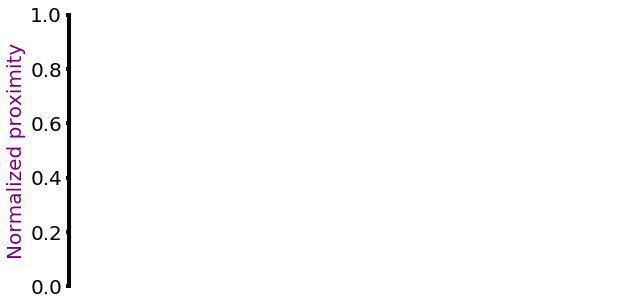

In [9]:
prop_cycle = plt.rcParams['axes.prop_cycle']
colors = prop_cycle.by_key()['color']

fig,ax1 = plt.subplots(1,1,figsize=(10,5))


#ax1.set_ylabel("Translation Unit\n volume fraction ($\mathregular{\phi}$)",fontsize=36,color='saddlebrown')
ax1.tick_params(axis='both', which='major', width=4,labelsize=20)

ax1.spines['bottom'].set_visible(False)
ax1.spines['top'].set_visible(False)
ax1.spines['right'].set_visible(False)
ax1.get_xaxis().set_visible(False)
ax1.spines['left'].set_linewidth(4)
ax1.set_ylabel('Normalized proximity',size=20,color='purple')

ax1.plot(gr,np.array(avg_tRNARibDist)/0.0059 ,color='purple',linewidth=4)

ax2 = ax1.twinx()
ax2.plot(gr,D,color='orange',linewidth=4)
ax2.spines['left'].set_position(('outward', 75)) 
ax2.tick_params(axis='both', which='major', width=4,labelsize=20)
ax2.spines['left'].set_linewidth(4)
ax2.spines['bottom'].set_visible(False)
ax2.spines['top'].set_visible(False)
ax2.yaxis.set_label_position('left') 
ax2.yaxis.set_ticks_position('left')# no x-ticks     
ax2.set_ylabel('Normalized diffusivity',size=20,color='orange')


#ax1.plot(gr, np.divide(((np.array([0.101, 0.0929,0.0842,0.077,0.072,0.068])-0.026)/2),np.array([0.101, 0.0929,0.0842,0.077,0.072,0.068])),color='purple',linewidth=4)
ax3 = ax1.twinx()
ax3.plot(dbl_rate[6:31],total_volfrac[6:31],label=r'$\mathregular{\phi_{ voxel}}$',color='saddlebrown',linewidth=4)
ax3.tick_params(axis='both', which='major', width=4,labelsize=20)
ax3.spines['right'].set_linewidth(4)
ax3.spines['bottom'].set_visible(False)
ax3.spines['top'].set_visible(False)
ax3.set_ylabel('Fraction of TU occupied',size=20,color='brown')
ax3.set_ylim(0,0.5)

ax4= ax1.twinx()
ax4.tick_params(axis='both', which='major', width=4,labelsize=20)
ax4.spines['right'].set_position(('outward', 75))
ax4.spines['right'].set_linewidth(4)
ax4.spines['bottom'].set_visible(False)
ax4.spines['top'].set_visible(False)
ax4.set_ylabel('Effective normalized\n search speed',size=20,color='green')
ax4.plot(gr,(1/avg_tRNARibDist)/(1/0.0059),color='green',linewidth=4)



NameError: name 'avg_tRNARibDist' is not defined

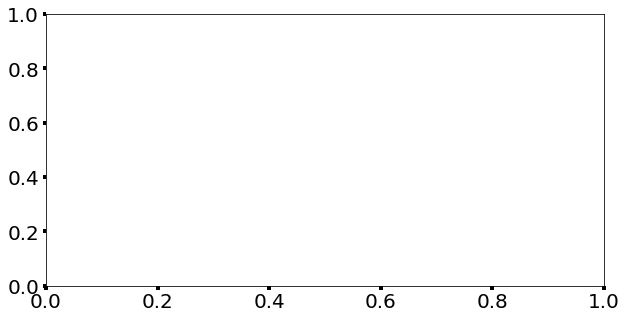

In [4]:
prop_cycle = plt.rcParams['axes.prop_cycle']
colors = prop_cycle.by_key()['color']

fig,ax1 = plt.subplots(1,1,figsize=(10,5))


#ax1.set_ylabel("Translation Unit\n volume fraction ($\mathregular{\phi}$)",fontsize=36,color='saddlebrown')
ax1.tick_params(axis='both', which='major', width=4,labelsize=20)
ax1.plot(gr,np.array(avg_tRNARibDist*1000) ,color='purple',linewidth=4)
ax1.spines['bottom'].set_visible(False)
ax1.spines['top'].set_visible(False)
ax1.spines['right'].set_visible(False)
ax1.get_xaxis().set_visible(False)
ax1.spines['left'].set_linewidth(4)
ax1.set_ylabel('tRNA-ribosome proximity (nm)',size=20,color='purple')


ax2 = ax1.twinx()
ax2.plot(gr,D*56,color='orange',linewidth=4)
ax2.spines['left'].set_position(('outward', 75)) 
ax2.tick_params(axis='both', which='major', width=4,labelsize=20)
ax2.spines['left'].set_linewidth(4)
ax2.spines['bottom'].set_visible(False)
ax2.spines['top'].set_visible(False)
ax2.yaxis.set_label_position('left') 
ax2.yaxis.set_ticks_position('left')# no x-ticks     
ax2.set_ylabel('tRNA diffusivity $(µm^2/s)$',size=20,color='orange')


#ax1.plot(gr, np.divide(((np.array([0.101, 0.0929,0.0842,0.077,0.072,0.068])-0.026)/2),np.array([0.101, 0.0929,0.0842,0.077,0.072,0.068])),color='purple',linewidth=4)
ax3 = ax1.twinx()
ax3.plot(dbl_rate[6:31],total_volfrac[6:31],label=r'$\mathregular{\phi_{ voxel}}$',color='saddlebrown',linewidth=4)
ax3.tick_params(axis='both', which='major', width=4,labelsize=20)
ax3.spines['right'].set_linewidth(4)
ax3.spines['bottom'].set_visible(False)
ax3.spines['top'].set_visible(False)
ax3.set_ylabel('Fraction of TU occupied',size=20,color='brown')
ax3.set_ylim(0,0.5)

ax4= ax1.twinx()
ax4.tick_params(axis='both', which='major', width=4,labelsize=20)
ax4.spines['right'].set_position(('outward', 75))
ax4.spines['right'].set_linewidth(4)
ax4.spines['bottom'].set_visible(False)
ax4.spines['top'].set_visible(False)
ax4.set_ylabel('Effective search speed $(µm^2/s)$',size=20,color='green')
ax4.plot(gr,D*(1/avg_tRNARibDist),color='green',linewidth=4)



[32.46391807 26.54275016 21.55313959 20.13772109 18.90284586 20.09886661]


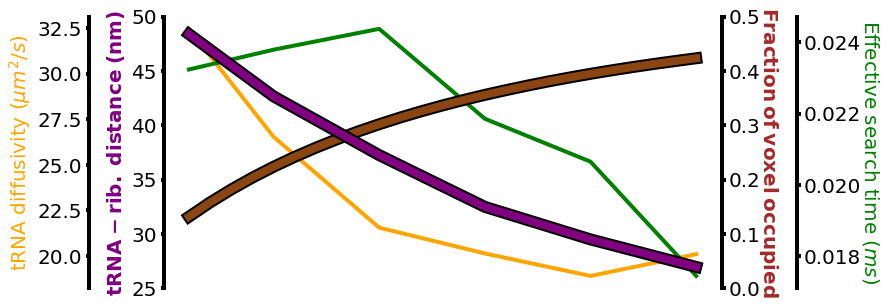

In [27]:
import matplotlib.patheffects as path_effects
prop_cycle = plt.rcParams['axes.prop_cycle']
colors = prop_cycle.by_key()['color']

fig,ax1 = plt.subplots(1,1,figsize=(10,5))

ax2 = ax1.twinx()
ax2.spines['left'].set_position(('outward', 75)) 
ax2.tick_params(axis='both', which='major', width=4,labelsize=20)
ax2.spines['left'].set_linewidth(4)
ax2.spines['bottom'].set_visible(False)
ax2.spines['top'].set_visible(False)
ax2.yaxis.set_label_position('left') 
ax2.yaxis.set_ticks_position('left')# no x-ticks     
ax2.set_ylabel('tRNA diffusivity $(µm^2/s)$',size=20,color='orange')
ax2.plot(gr,D*56,color='orange',linewidth=4)
ax2.set_zorder(2)

ax4= ax1.twinx()
ax4.tick_params(axis='both', which='major', width=4,labelsize=20)
ax4.spines['right'].set_position(('outward', 75))
ax4.spines['right'].set_linewidth(4)
ax4.spines['bottom'].set_visible(False)
ax4.spines['top'].set_visible(False)
ax4.set_ylabel('Effective search time $(ms)$',size=20,color='green',labelpad=20,rotation=270)
print(D*56)
MSD_tRNARibDist = ((avg_tRNARibDist)**2)/(6*D*56)
ax4.plot(gr,MSD_tRNARibDist*1000,color='green',linewidth=4)
ax4.set_zorder(5)

#ax1.plot(gr, np.divide(((np.array([0.101, 0.0929,0.0842,0.077,0.072,0.068])-0.026)/2),np.array([0.101, 0.0929,0.0842,0.077,0.072,0.068])),color='purple',linewidth=4)
ax3 = ax1.twinx()
ax3.tick_params(axis='both', which='major', width=4,labelsize=20)
ax3.spines['right'].set_linewidth(4)
ax3.spines['bottom'].set_visible(False)
ax3.spines['top'].set_visible(False)
ax3.set_ylabel(r"$\bf{"+'Fraction\: of\: voxel\: occupied'+"}$",size=20, labelpad=20,color='brown',rotation=270)
ax3.set_ylim(0,0.5)
ax3.plot(dbl_rate[6:31],total_volfrac[6:31],label=r'$\mathregular{\phi_{ voxel}}$',color='black',linewidth=12)
ax3.plot(dbl_rate[6:31],total_volfrac[6:31],label=r'$\mathregular{\phi_{ voxel}}$',color='saddlebrown',linewidth=8)
ax3.set_zorder(7)

#ax1.set_ylabel("Translation Unit\n volume fraction ($\mathregular{\phi}$)",fontsize=36,color='saddlebrown')
ax1.tick_params(axis='both', which='major', width=4,labelsize=20)
ax1.spines['bottom'].set_visible(False)
ax1.spines['top'].set_visible(False)
ax1.spines['right'].set_visible(False)
ax1.get_xaxis().set_visible(False)
ax1.spines['left'].set_linewidth(4)
ax1.set_ylabel(r"$\bf{" + 'tRNA-rib.\;distance\;(nm)' + "}$",size=20,color='purple')
ax1.plot(gr,np.array(avg_tRNARibDist*1000)-(13+5.9) ,color='black',linewidth=12,alpha=1)
ax1.plot(gr,np.array(avg_tRNARibDist*1000)-(13+5.9) ,color='purple',linewidth=8)
ax1.set_ylim(25,50)
ax1.set_zorder(9)
ax1.patch.set_visible(False) # hide the 'canvas' 

#Maybe instead of effective search time, introduce effective mix time [or use facilitated searching later]
#as a term here? and show how that changes?

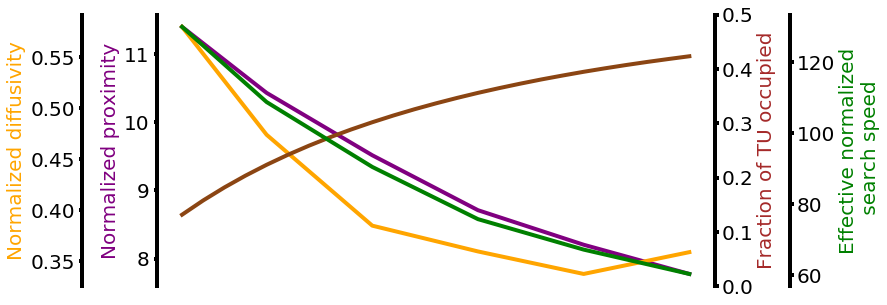

In [28]:
prop_cycle = plt.rcParams['axes.prop_cycle']
colors = prop_cycle.by_key()['color']

fig,ax1 = plt.subplots(1,1,figsize=(10,5))


#ax1.set_ylabel("Translation Unit\n volume fraction ($\mathregular{\phi}$)",fontsize=36,color='saddlebrown')
ax1.tick_params(axis='both', which='major', width=4,labelsize=20)

ax1.spines['bottom'].set_visible(False)
ax1.spines['top'].set_visible(False)
ax1.spines['right'].set_visible(False)
ax1.get_xaxis().set_visible(False)
ax1.spines['left'].set_linewidth(4)
ax1.set_ylabel('Normalized proximity',size=20,color='purple')

ax1.plot(gr,np.array(avg_tRNARibDist)/0.0059 ,color='purple',linewidth=4)

ax2 = ax1.twinx()
ax2.plot(gr,D,color='orange',linewidth=4)
ax2.spines['left'].set_position(('outward', 75)) 
ax2.tick_params(axis='both', which='major', width=4,labelsize=20)
ax2.spines['left'].set_linewidth(4)
ax2.spines['bottom'].set_visible(False)
ax2.spines['top'].set_visible(False)
ax2.yaxis.set_label_position('left') 
ax2.yaxis.set_ticks_position('left')# no x-ticks     
ax2.set_ylabel('Normalized diffusivity',size=20,color='orange')

#ax1.plot(gr, np.divide(((np.array([0.101, 0.0929,0.0842,0.077,0.072,0.068])-0.026)/2),np.array([0.101, 0.0929,0.0842,0.077,0.072,0.068])),color='purple',linewidth=4)
ax3 = ax1.twinx()
ax3.plot(dbl_rate[6:31],total_volfrac[6:31],label=r'$\mathregular{\phi_{ voxel}}$',color='saddlebrown',linewidth=4)
ax3.tick_params(axis='both', which='major', width=4,labelsize=20)
ax3.spines['right'].set_linewidth(4)
ax3.spines['bottom'].set_visible(False)
ax3.spines['top'].set_visible(False)
ax3.set_ylabel('Fraction of TU occupied',size=20,color='brown')
ax3.set_ylim(0,0.5)

ax4= ax1.twinx()
ax4.tick_params(axis='both', which='major', width=4,labelsize=20)
ax4.spines['right'].set_position(('outward', 75))
ax4.spines['right'].set_linewidth(4)
ax4.spines['bottom'].set_visible(False)
ax4.spines['top'].set_visible(False)
ax4.set_ylabel('Effective normalized\n search speed',size=20,color='green')
MSD_tRNARibDist = (avg_tRNARibDist**2)/(6*D)
MSD_tRNADist = (0.0059**2)/(6*D)
ax4.plot(gr,MSD_tRNARibDist/MSD_tRNADist,color='green',linewidth=4)

In [29]:
def calcPairDistribFunc(path,expt_start,expt_end,species1,species2):
    df_outputs = pd.read_csv(path+"outputMolPosList.txt",sep=" ",header=None) #Add batch processing here potentially
    distance = list()
    for expt_num, row in df_outputs.iterrows():
        succincorp_count = 0
        rxn17_count = 0
        rxn21_count = 0
        if(expt_num>=expt_start and expt_num<expt_end):
            try:
                my_cols=["timestep","species","_","x","y","z","id"]
                df = pd.read_csv(path+row[0],delimiter=" ",header=None, names=my_cols)
                df_species1=df[df['species']==species1]
                df_species1=df_species1[['x','y','z']]
                df_species2=df[df['species']==species2]
                df_species2=df_species2[['x','y','z']]

                for i, coords in df_species1.iterrows():
                    distance.append(np.mean(np.sqrt(np.square(df_species2-coords.values).sum(axis=1)).values))
            except:
                print("Error on expt ", expt_num)
    #plt.hist(distance)
    print(np.mean(distance))
    return np.mean(distance)

path = '/Users/Akshay/Dropbox/Life/EndyLab/Research/TranslationDynamics/data/'
data = '190320_1830'
gr=[0.6,1.0,1.5,2.0,2.5,3.0]
avg_tRNARibDist = list()
for i in range(1,len(gr)+1):
    avg_tRNARibDist.append(calcPairDistribFunc(path+data+'/',50*i,50*(i+1),3,5))
avg_tRNARibDist = np.array(avg_tRNARibDist)
print(avg_tRNARibDist)

0.06728136393504339
0.06155896663242396
0.05615068639306645
0.051389305223030486
0.04839552806345307
Error on expt  349
0.045863537064776194
[0.06728136 0.06155897 0.05615069 0.05138931 0.04839553 0.04586354]


In [ ]:
#Tomorrow: Calculate averazge distance btwn ribosome and tRNA
# Normalize to an effective diffusivity
# Add declarative titles to fig 2
# Figure out alternative y axis for fig 2
#Change fig 3 to not have grey on a and b
#Find a third plot for fig 3 to clarify all the data?
#Check crowder vol. frac to see if up diffusivity makes sense

In [ ]:
0.0059/avg_tRNARibDist


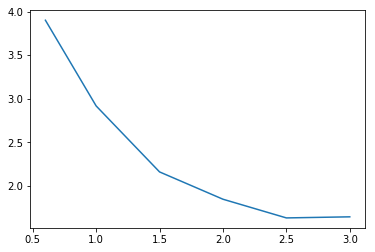

In [22]:
plt.plot(gr,D*100*avg_tRNARibDist)

Text(0.5, 0, 'growth rate')

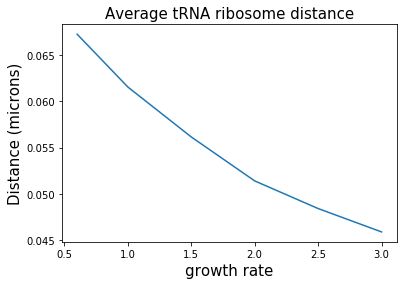

In [23]:
plt.plot(gr,avg_tRNARibDist)
plt.title('Average tRNA ribosome distance',size=15)
plt.ylabel('Distance (microns)',size=15)
plt.xlabel('growth rate',size=15)

Text(0.5, 0, 'growth rate')

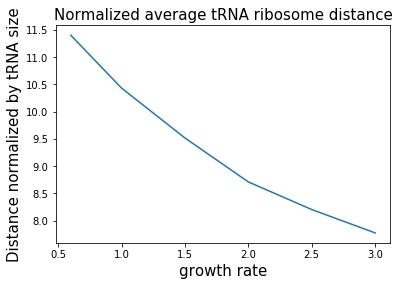

In [24]:
plt.plot(gr,avg_tRNARibDist/0.0059)
plt.title('Normalized average tRNA ribosome distance',size=15)
plt.ylabel('Distance normalized by tRNA size',size=15)
plt.xlabel('growth rate',size=15)

Text(0.5, 0, 'growth rate')

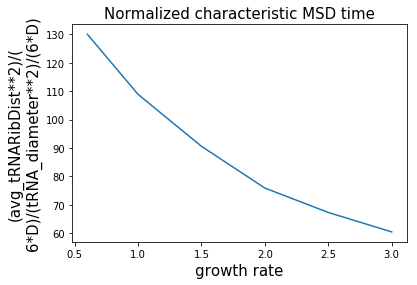

In [25]:
#Relative time required for brownian search
MSD_tRNARibDist = (avg_tRNARibDist**2)/(6*D)
MSD_tRNADist = (0.0059**2)/(6*D)
plt.plot(gr,MSD_tRNARibDist/MSD_tRNADist)
plt.title('Normalized characteristic MSD time',size=15)
plt.ylabel('(avg_tRNARibDist**2)/(\n6*D)/(tRNA_diameter**2)/(6*D)',size=15)
plt.xlabel('growth rate',size=15)

Text(0.5, 0, 'growth rate')

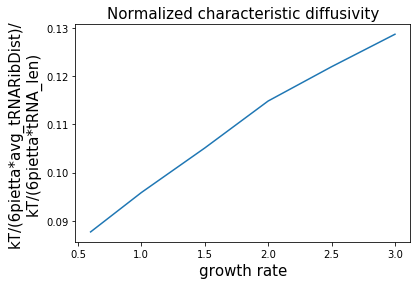

In [26]:
plt.plot(gr,(1/avg_tRNARibDist)/(1/0.0059))
plt.title('Normalized characteristic diffusivity',size=15)
plt.ylabel('kT/(6pietta*avg_tRNARibDist)/\nkT/(6pietta*tRNA_len)',size=15)
plt.xlabel('growth rate',size=15)

In [27]:
(avg_tRNARibDist**2)/(6*D)

array([0.00130144, 0.00133252, 0.00136533, 0.00122397, 0.00115643,
       0.00097679])

In [28]:
(0.0059+0.013)/np.array(avg_tRNARibDist)

array([0.28090988, 0.3070227 , 0.33659428, 0.3677808 , 0.39053195,
       0.41209207])

In [29]:
avg_tRNARibDist

array([0.06728136, 0.06155897, 0.05615069, 0.05138931, 0.04839553,
       0.04586354])

In [81]:
(D*56)

array([32.46391807, 26.54275016, 21.55313959, 20.13772109, 18.90284586,
       20.09886661])

In [ ]:
plt.plot(gr,(avg_tRNARibDist**2/D))

In [35]:
print(D*56)

[32.46391807 26.54275016 21.55313959 20.13772109 18.90284586 20.09886661]


In [83]:
tRNA_dist = ((avg_tRNARibDist*1000)-(13+5.9))/1000
D_um = D*56
print(tRNA_dist)
print(tRNA_dist**2)
print(D_um)
MSD_tRNARibDist = tRNA_dist**2/(6*D_um)
print(MSD_tRNARibDist*1000)

[0.04838136 0.04265897 0.03725069 0.03248931 0.02949553 0.02696354]
[0.00234076 0.00181979 0.00138761 0.00105555 0.00086999 0.00072703]
[32.46391807 26.54275016 21.55313959 20.13772109 18.90284586 20.09886661]
[0.01201722 0.01142677 0.01073017 0.00873613 0.00767068 0.0060288 ]


In [ ]:
0.02696354

D [33.8804659  30.3781096  26.33330652 25.24978214 23.21700184 22.39614547
 22.21761187 21.92690297 20.87998324 19.46234456 19.29173454 18.77353947
 18.43655941 18.58178146 19.19679243]
[0.6 0.8 1.  1.2 1.4 1.5 1.6 1.8 2.  2.2 2.4 2.5 2.6 2.8 3. ]


(25, 50)

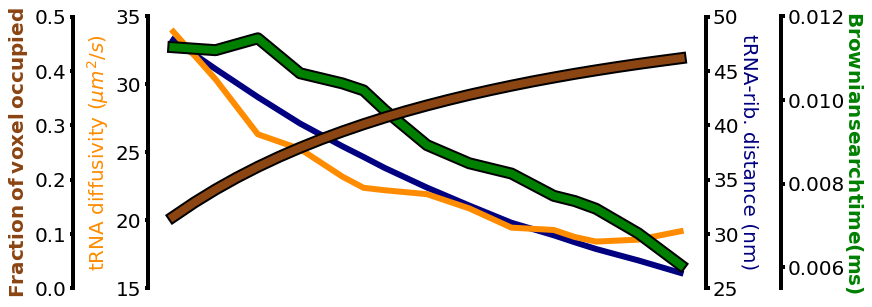

In [37]:
import matplotlib.patheffects as path_effects
prop_cycle = plt.rcParams['axes.prop_cycle']
colors = prop_cycle.by_key()['color']

fig,ax1 = plt.subplots(1,1,figsize=(10,5))

ax2 = ax1.twinx()
ax2.spines['left'].set_position(('outward', 75)) 
ax2.tick_params(axis='both', which='major', width=4,labelsize=20)
ax2.spines['left'].set_linewidth(4)
ax2.spines['bottom'].set_visible(False)
ax2.spines['top'].set_visible(False)
ax2.yaxis.set_label_position('left') 
ax2.yaxis.set_ticks_position('left')# no x-ticks     

ax1.set_ylabel('tRNA diffusivity $(µm^2/s)$',size=20,color='darkorange')
ax1.plot(gr,D,color='darkorange',linewidth=6)
ax1.set_zorder(2)
ax1.set_ylim(15,35)

ax4= ax1.twinx()
ax4.tick_params(axis='both', which='major', width=4,labelsize=20)
ax4.spines['right'].set_position(('outward', 75))
ax4.spines['right'].set_linewidth(4)
ax4.spines['bottom'].set_visible(False)
ax4.spines['top'].set_visible(False)

print("D",D)
print(gr)
ax4.set_ylabel(r"$\bf{"+"Brownian search time (ms)"+"}$",size=20,color='green',labelpad=20,rotation=270)
MSD_tRNARibDist = ((((avg_tRNARibDist*1000)-(13+5.9))/1000)**2)/(6*D)
ax4.plot(gr,(MSD_tRNARibDist)*1000,color='black',linewidth=12)
ax4.plot(gr,(MSD_tRNARibDist)*1000,color='green',linewidth=8)
ax4.set_zorder(8)
ax4.set_ylim(0.0055,0.012)

#ax1.plot(gr, np.divide(((np.array([0.101, 0.0929,0.0842,0.077,0.072,0.068])-0.026)/2),np.array([0.101, 0.0929,0.0842,0.077,0.072,0.068])),color='purple',linewidth=4)
ax3 = ax1.twinx()
ax3.tick_params(axis='both', which='major', width=4,labelsize=20)
ax3.spines['right'].set_linewidth(4)
ax3.spines['bottom'].set_visible(False)
ax3.spines['top'].set_visible(False)

ax2.set_ylabel(r"$\bf{"+'Fraction\: of\: voxel\: occupied'+"}$",size=20, color='saddlebrown' )
ax2.set_ylim(0,0.5)
ax2.plot(dbl_rate[6:31],total_volfrac[6:31],label=r'$\mathregular{\phi_{ voxel}}$',color='black',linewidth=12)
ax2.plot(dbl_rate[6:31],total_volfrac[6:31],label=r'$\mathregular{\phi_{ voxel}}$',color='saddlebrown',linewidth=8)
ax2.set_zorder(9)
ax2.set_ylim(0,0.5)

ax1.tick_params(axis='both', which='major', width=4,labelsize=20)
ax1.spines['bottom'].set_visible(False)
ax1.spines['top'].set_visible(False)
ax1.spines['right'].set_visible(False)
ax1.get_xaxis().set_visible(False)
ax1.spines['left'].set_linewidth(4)
ax1.patch.set_visible(False) # hide the 'canvas' 

ax3.set_ylabel("tRNA-rib. distance (nm)",size=20,color='navy',labelpad=20,rotation=270)
ax3.plot(gr,np.array(avg_tRNARibDist*1000)-(13+5.9) ,color='navy',linewidth=6)
ax3.set_ylim(25,50)
ax3.set_zorder(1)
ax3.set_ylim(25,50)

#Maybe instead of effective search time, introduce effective mix time [or use facilitated searching later]
#as a term here? and show how that changes?

0
0.06675337855876505
1
0.0640706725202098
2
0.061486488903757824
3
0.05905313971608832
4
0.05696261945604961
5
0.055982084187130916
6
0.05497406432406245
7
0.05316555166029716
8
0.05151354608711087
9
0.04992669838371363
10
0.04877636822450501
11
0.048130620462314345
12
0.04751539235383099
13
0.04646390039052546
14
Error (e.g., Missing expt or incorrect input)
Error (e.g., Missing expt or incorrect input)


No handles with labels found to put in legend.


Error on expt  748
Error on expt  749
0.04531785700693537
[0.06675338 0.06407067 0.06148649 0.05905314 0.05696262 0.05598208
 0.05497406 0.05316555 0.05151355 0.0499267  0.04877637 0.04813062
 0.04751539 0.0464639  0.04531786]
[33.8804659  30.3781096  26.33330652 25.24978214 23.21700184 22.39614547
 22.21761187 21.92690297 20.87998324 19.46234456 19.29173454 18.77353947
 18.43655941 18.58178146 19.19679243]


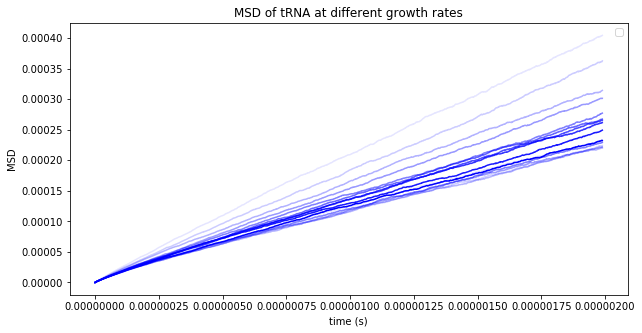

In [33]:
#crowder,ribosome,tRNA
path='/Users/Akshay/Dropbox/Life/EndyLab/Research/TranslationDynamics/data/'
data = "190418_2031/"
fig,ax = plt.subplots(figsize=(10,5))
#labels = ['dilute','0.6 dbl/hr','1.0 dbl/hr','1.5 dbl/hr','2.0 dbl/hr','2.5 dbl/hr','3.0 dbl/hr']
D = list()
gr=np.array([6,8,10,12,14,15,16,18,20,22,24,25,26,28,30])/10

avg_tRNARibDist = list()
for i in range(0,len(gr)):
    print(i)
    MSD_data = MSD(path+data,i*50,i*50+50,'tRNA')
    ax.plot(MSD_data[2],MSD_data[1],color='blue',alpha=0.1*i+0.1)
    D.append((MSD_data[1][-1]-MSD_data[1][0])/(6*(MSD_data[2][-1]-MSD_data[2][0])))
    avg_tRNARibDist.append(calcPairDistribFunc(path+data+'/',50*i,50*(i+1),3,5))
ax.legend()
ax.set_title('MSD of tRNA at different growth rates')
D=np.array(D)
avg_tRNARibDist = np.array(avg_tRNARibDist)
ax.set_xlabel("time (s)")
ax.set_ylabel("MSD")
print(avg_tRNARibDist)
print(D)

In [5]:
path = '/Users/Akshay/Dropbox/Life/EndyLab/Research/TranslationDynamics/data/'
data = '190418_1657'
gr=[0.6,1.0,1.5,2.0,2.5,3.0]
avg_tRNARibDist = list()
for i in range(1,len(gr)+1):
    avg_tRNARibDist.append(calcPairDistribFunc(path+data+'/',50*i,50*(i+1),3,5))
avg_tRNARibDist = np.array(avg_tRNARibDist)
print(avg_tRNARibDist)

NameError: name 'calcPairDistribFunc' is not defined

In [8]:
print(D)

[7.10466231 6.11282016 5.39855724 5.94293615 5.33137464]
